<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
#df = pd.read_csv("iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginica y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
species_rep = df["species"].unique()

#Usamos groupby para separar species
group_species = df.groupby("species")
#Ponemos sepalLength (podria ser cualquiera) para poder contar en species
group_species[['sepalLength']].count().reset_index()


,species,sepalLength
0,virginica,5
1,SETOSA,5
2,Setosa,10
3,VERSICOLOR,5
4,VIRGINICA,5
5,Versicolor,5
6,setosa,35
7,versicolor,38
8,virginica,34
9,virginica,6


Podemos notar diferentes problemas dentro de species:
1) Datos vacíos: Serán reemplazados por default

2) Distinción entre mayuscula y minuscula 

3) Aparición de categorias repetidas debido a espacios



In [4]:
df.loc[df['species'].isnull(),'species'] = 'default' #Resolvemos 1)

df['species'] = df['species'].str.lower().str.strip() #Resolvemos 2) y 3)

Volvemos a contar sobre cada especie para notar que se encuentran solo las 3 categorias pedidas y los valores nan fueron reemplazados por default

In [5]:
#Usamos groupby para separar species
group_species = df.groupby("species")
#Ponemos sepalLength (podria ser cualquiera) para poder contar en species
group_species[['sepalLength']].count().reset_index()

,species,sepalLength
0,default,1
1,setosa,50
2,versicolor,48
3,virginica,50


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

Primero realizamos la corrección de largo y ancho para nan asignando 0:

In [6]:
df.loc[df[df.columns[0]].isnull(),df.columns[0]] = '0'
df.loc[df[df.columns[1]].isnull(),df.columns[1]] = '0'
df.loc[df[df.columns[2]].isnull(),df.columns[2]] = '0'
df.loc[df[df.columns[3]].isnull(),df.columns[3]] = '0'

<AxesSubplot:>

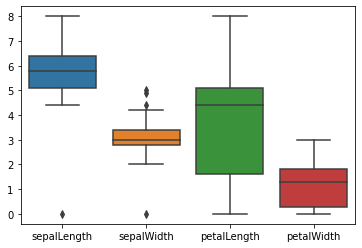

In [7]:
data_st = df.drop(["species"],axis=1)
sns.boxplot(data = data_st)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

Realizamos un filtro de las variables

In [8]:
L =[]
cont=0
cotas_sup  = [7,4.5,7,2.5]
cotas_inf = [4,2,1,0.1]
for variable in df.columns[:4]:
    mask_inf =  df[variable].astype(float) >=cotas_inf[cont]
    mask_sup =  df[variable].astype(float) <=cotas_sup[cont]
    mask = mask_inf & mask_sup
    cont+=1
    L.append(mask)
#obtenemos una lista con el filtrado de cada variable, ahora usaremos lógica proposicional 


Notemos que ante la aparición de un valor False debemos asignar un label False, si solo hay True debemos asignar True, esto tiene la misma dinámica que el operador lógico de conjunción "y" pues ante la aparición de un False retorna False, así nuestra columna label es la conjunción entre los filtros

In [9]:
etiquetas=[]
for i in range(len(L[0])):
    etiquetas.append((L[0][i]) and  (L[1][i]) and  (L[2][i]) and  (L[3][i]))
label_row = pd.DataFrame(etiquetas,columns=["label"])
df = pd.concat([df,label_row], axis=1, sort=False)

In [10]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3,1.1,0.1,setosa,True
146,4.8,3,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

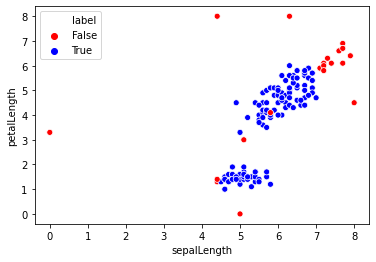

In [13]:
#sepalLength vs petalLength
sns.scatterplot(
    x = "sepalLength",
    y = "petalLength",
    data = df,
    hue = "label",
    palette = ["red","blue"]
)

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

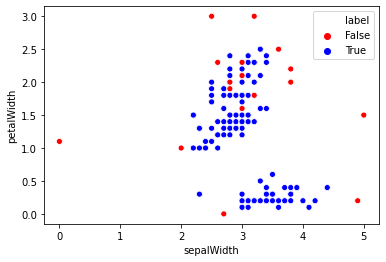

In [14]:
#sepalWidth vs petalWidth 
sns.scatterplot(
    x = "sepalWidth",
    y = "petalWidth",
    data = df,
    hue = "label",
    palette = ["red","blue"]
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Los datos válidos tienen etiqueta True, realizando la filtración:

In [15]:
mask = df['label']==True
df_filtrado = df[mask]

In [16]:
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
5,6.7,3.1,5.6,2.4,virginica,True
6,5.8,2.8,5.1,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3,1.1,0.1,setosa,True
146,4.8,3,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


In [18]:
print("Observemos la cantidad de datos perdidos al realizar el filtrado")
print('Cantidad de filas dataset sin filtro:',len(df))
print('Cantidad de filas dataset con filtro:',len(df_filtrado))

Observemos la cantidad de datos perdidos al realizar el filtrado
Cantidad de filas dataset sin filtro: 150
Cantidad de filas dataset con filtro: 129


El grafico pedido se presenta a continuación:


<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

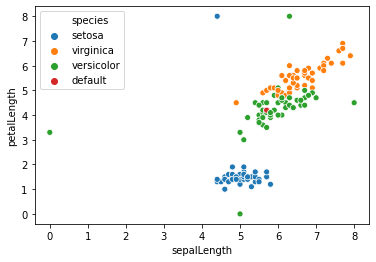

In [21]:
print("El grafico pedido se presenta a continuación:")

#sepalLength vs petalLength
sns.scatterplot(
    x = "sepalLength",
    y = "petalLength",
    data = df,
    hue = "species",
)

Como observación podemos notar que los valores que eran Nan anteriormente son mucho menores que la cantidad de valores que no son perdidos, además podemos notar que las especies presentan algunos datos dispersos dentro de la nube de puntos, en el caso de setosa se puede ver que existe un punto sobre la nube donde se cateogoriza y ante esto se suele hacer un análisis de Outliers para tratar de mejorar la separabilidad de estos conjuntos